In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, MCMCChains, Plots, ProgressMeter

ProgressMeter.ijulia_behavior(:clear)
gr(fmt=:png)

┌ Info: Precompiling main [d4387e3f-b08f-4148-9d80-1476cd5e70f5]
└ @ Base loading.jl:1664


Plots.GRBackend()

In [3]:
d = 100
model = Model(ξ=MvNormal(d, 1.0));

In [4]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=1e4, n_burn=1e3);
c1 = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
  HMC:  0.8415598581947096


Acceptance Ratio = 0.8412


In [5]:
s2, a2 = mcmc(HaRAM(ϵ=0.5, L=20, γ=0.05), model; n=1e4, n_burn=1e3);
c2 = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:49
  HaRAM:  0.6251249886373966


Acceptance Ratio = 0.6238


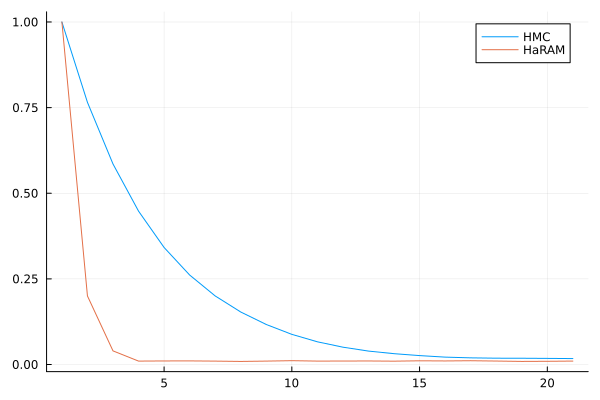

In [6]:
plot(mean(abs.(autocor(c1, lags=0:20)[:, :]), dims=1)', label="HMC")
plot!(mean(abs.(autocor(c2, lags=0:20)[:, :]), dims=1)', label="HaRAM")

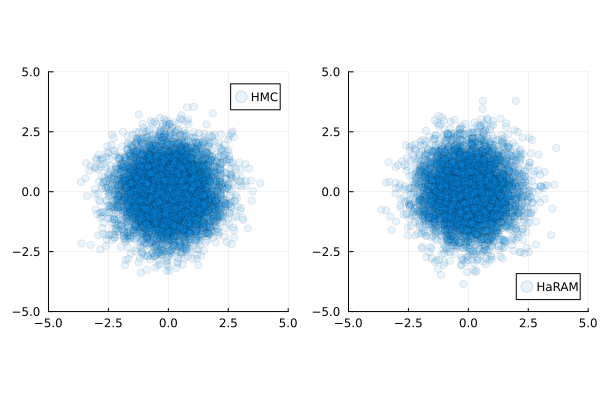

In [7]:
Ds = sample(1:100, 2, replace=false)
plot(
    scatter(s1[a1, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="HMC"),
    scatter(s2[a2, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="HaRAM")
)

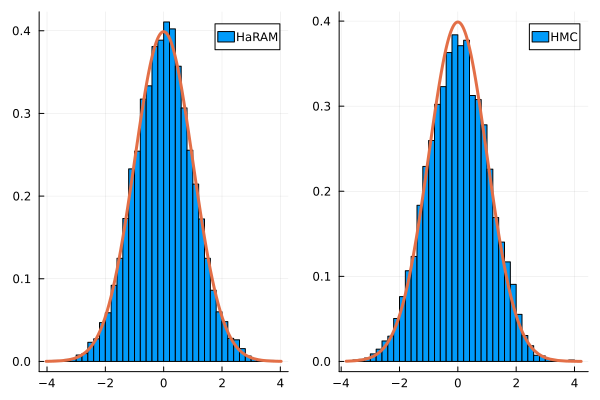

In [8]:
D = sample(1:d, 1)
plot(
    begin
        histogram(s1[a1, D] |> m2t, normalize=true, label="HaRAM")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
    begin
        histogram(s2[a2, D] |> m2t, normalize=true, label="HMC")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
)